### Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

##### Import libraries and dataset.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Prathmesh\Downloads\US_Accidents_March23.csv\US_Accidents_March23.csv")

In [4]:
df.head(1)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

##### Step 2: Focus on Relevant Columns

In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [18]:
# List of desired columns
selected_columns = [
    'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng','Street','Hour','Description', 'City', 'Wind_Speed(mph)', 'Temperature(F)','Humidity(%)', 'Visibility(mi)', 'Weather_Condition', 'Sunrise_Sunset']
df_subset = df[selected_columns].copy()

In [14]:
df_subset.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Street,Description,City,Wind_Speed(mph),Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Sunrise_Sunset
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,I-70 E,Right lane blocked due to accident on I-70 Eas...,Dayton,NaN,36.9,91.0,10.0,Light Rain,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,Brice Rd,Accident on Brice Rd at Tussing Rd. Expect del...,Reynoldsburg,NaN,37.9,100.0,10.0,Light Rain,Night
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,State Route 32,Accident on OH-32 State Route 32 Westbound at ...,Williamsburg,3.5,36.0,100.0,10.0,Overcast,Night


##### Step 3: Visualizations 

In [19]:
df_subset['Start_Time'] = pd.to_datetime(df_subset['Start_Time'])
df_subset['Hour'] = df_subset['Start_Time'].dt.hour


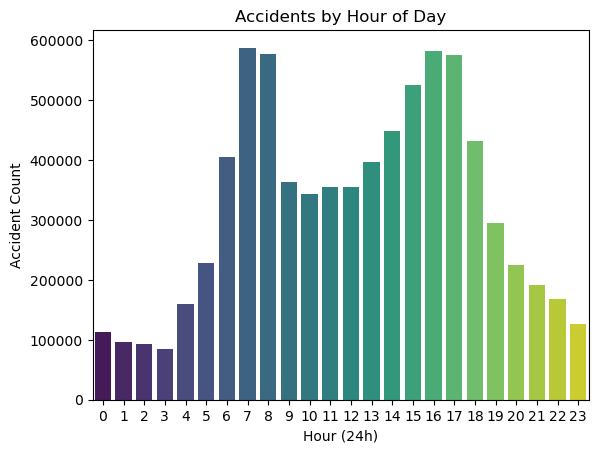

In [20]:
sns.countplot(x='Hour', data=df_subset, palette='viridis')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour (24h)')
plt.ylabel('Accident Count')
plt.show()

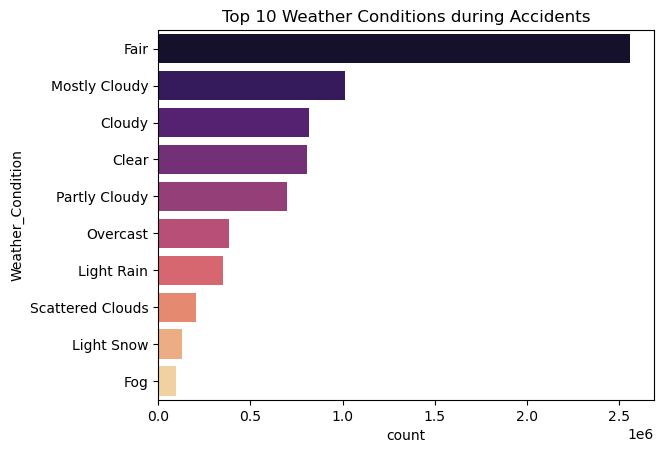

In [21]:
top_weather = df_subset['Weather_Condition'].value_counts().nlargest(10).index
filtered = df_subset[df_subset['Weather_Condition'].isin(top_weather)]

sns.countplot(y='Weather_Condition', data=filtered, order=top_weather, palette='magma')
plt.title('Top 10 Weather Conditions during Accidents')
plt.show()


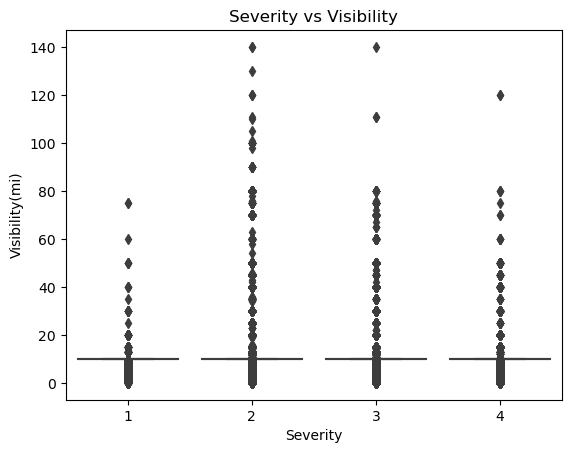

In [23]:
sns.boxplot(x='Severity', y='Visibility(mi)', data=df_subset)
plt.title('Severity vs Visibility')
plt.show()


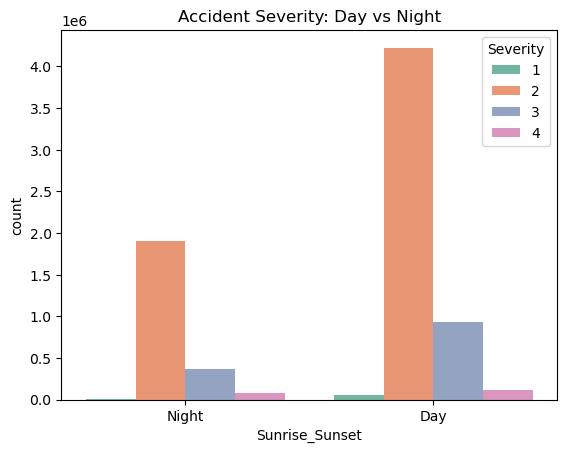

In [24]:
sns.countplot(x='Sunrise_Sunset', hue='Severity', data=df, palette='Set2')
plt.title('Accident Severity: Day vs Night')
plt.show()


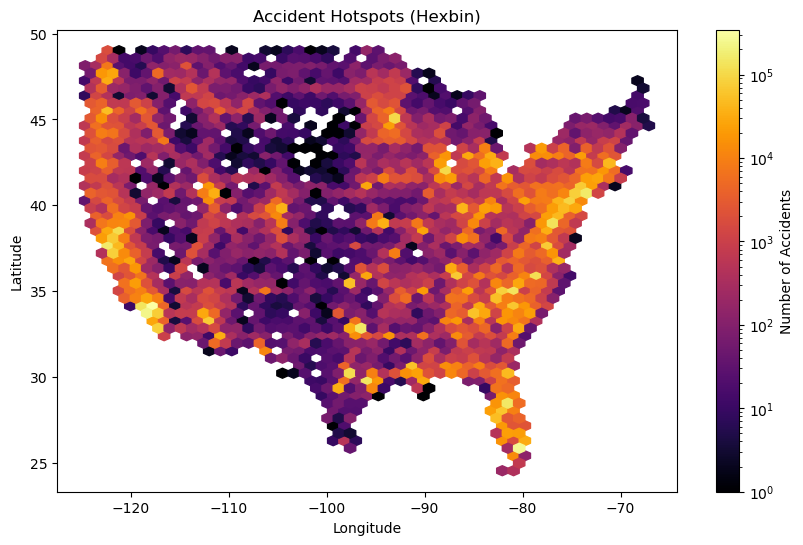

In [26]:
plt.figure(figsize=(10, 6))
plt.hexbin(df_subset['Start_Lng'], df_subset['Start_Lat'], gridsize=50, cmap='inferno', bins='log')
plt.colorbar(label='Number of Accidents')
plt.title('Accident Hotspots (Hexbin)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
